In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os
input_dir = "./images/"
target_dir = "./annotations/trimaps/"
input_img_paths = sorted(
    [os.path.join(input_dir, fname)
for fname in os.listdir(input_dir) if fname.endswith(".jpg")])

In [12]:
target_paths = sorted(
    [os.path.join(target_dir, fname)
for fname in os.listdir(target_dir)
if fname.endswith(".png") and not fname.startswith(".")])


In [6]:
# ! wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
CHECKPOINT_PATH='./sam_vit_h_4b8939.pth'

In [7]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [8]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)

In [9]:
# Import opencv package
# pip3 install opencv-python
import cv2

def get_mask(image):
    # Convert to RGB format
    
    # Give the path of your image
    IMAGE_PATH= image

    # Read the image from the path
    image= cv2.imread(IMAGE_PATH)

    # Convert to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generate segmentation mask
    output_mask = mask_generator.generate(image_rgb)
    sam_results = output_mask
    print(".",end="")

    return sam_results

In [11]:
input_img_paths

['./images/0.jpg',
 './images/1.jpg',
 './images/10.jpg',
 './images/3.jpg',
 './images/4.jpg',
 './images/5.jpg',
 './images/6.jpg',
 './images/7.jpg',
 './images/8.jpg',
 './images/9.jpg']

In [36]:
target_dir+input_img_paths[0].split("/")[-1].split(".")[0]+".png"

'./annotations/trimaps/0.png'

In [19]:
target_paths

['./annotations/trimaps/0.png',
 './annotations/trimaps/1.png',
 './annotations/trimaps/10.png',
 './annotations/trimaps/2.png',
 './annotations/trimaps/3.png',
 './annotations/trimaps/4.png',
 './annotations/trimaps/5.png',
 './annotations/trimaps/6.png',
 './annotations/trimaps/7.png',
 './annotations/trimaps/8.png',
 './annotations/trimaps/9.png']

# Find the Best Image

In [18]:
def find_the_best_mask(sam_results):
    a = []
    for val in sam_results:
        #print((val['predicted_iou']))
        a.append(val['predicted_iou'])
    ar = np.array(a)
    mask = sam_results[np.argmax(ar)]['segmentation']
    return mask



In [41]:
def save_the_mask(mask, image_name):
    #target_dir
    # Change from Bool to uint8
    new_mask = mask.astype(np.uint8)
    
    # Put a Contour on the row side
    print("R",end='')
    for row in range(0, new_mask.shape[0]):
        #print("R",end='')
        for col in range(0, new_mask.shape[1]-1):
            #print(new_mask[row,col],end='')
            #print(previous_pixel)
            if col != new_mask.shape[1]-1:
                next_pixel = new_mask[row,col+1]
            #print(" n:",row,",",col+1," ",next_pixel)
            #print("[",new_mask[row,col],"-",next_pixel,"]",end='')
            if (new_mask[row,col] == 0) & (next_pixel == 1):
                new_mask[row,col] = 3
                #print("change")
            if (new_mask[row,col] == 1) & (next_pixel == 0):
                #print("change")
                new_mask[row,col+1] = 3

    # put a contour on the column side
    print("C",end='')
    for col in range(0, new_mask.shape[1]):
        #print("C",end='')
        for row in range(0, new_mask.shape[0]-1):
            #print(new_mask[row,col],end='')
            #print(previous_pixel)
            if row != new_mask.shape[0]-1:
                next_pixel = new_mask[row+1,col]
            #print(" n:",row,",",col+1," ",next_pixel)
            #print("[",new_mask[row,col],"-",next_pixel,"]",end='')
            if (new_mask[row,col] == 0) & ((next_pixel == 4) | (next_pixel == 1)):
                new_mask[row,col] = 3
                #print("change")
            if ((new_mask[row,col] == 4) | (new_mask[row,col] == 1)) & (next_pixel == 0):
                #print("change")
                new_mask[row+1,col] = 3
    
    # we need to change the backgrond from 0 to 2
    print("B",end='')
    for row in range(0, new_mask.shape[0]):
        for col in range(0, new_mask.shape[1]):
            if (new_mask[row,col] == 0):
                new_mask[row,col] = 2
        
    mask_image = (new_mask).astype(np.uint8)  # Convert to uint8 format

    # Save the mask image
    print("S",end='')
    png_mask = target_dir+image_name.split("/")[-1].split(".")[0]+".png"
    cv2.imwrite(png_mask, mask_image)
    return png_mask, mask_image

In [37]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127 
    plt.axis("off")
    plt.imshow(normalized_array[:, :])
    plt.show()

#img = img_to_array(load_img(target_paths[0], color_mode="grayscale"))
#display_target(new_mask)

Processing image ./images/0.jpg
.RCBS

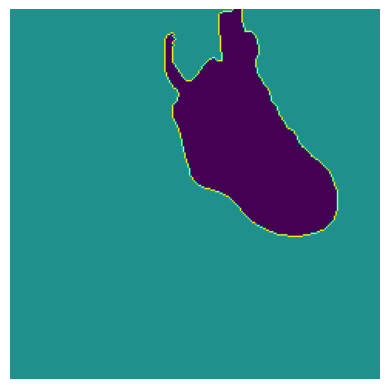

Saved mask ./annotations/trimaps/0.png
Processing image ./images/1.jpg
.RCBS

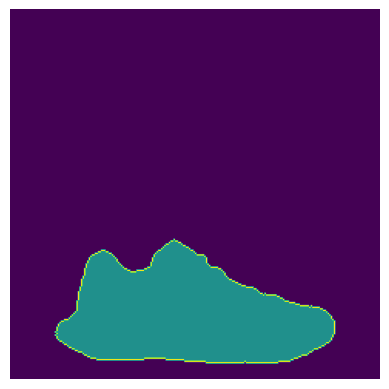

Saved mask ./annotations/trimaps/1.png
Processing image ./images/10.jpg
.RCBS

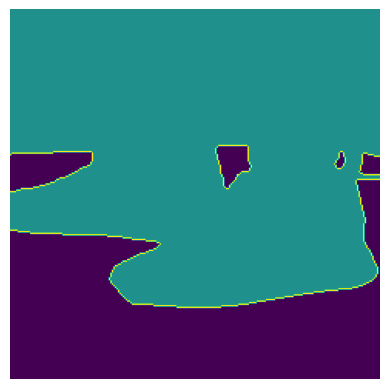

Saved mask ./annotations/trimaps/10.png
Processing image ./images/3.jpg
.RCBS

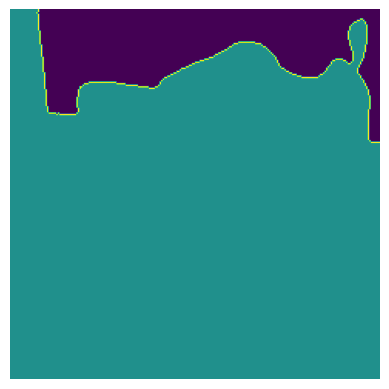

Saved mask ./annotations/trimaps/3.png
Processing image ./images/4.jpg
.RCBS

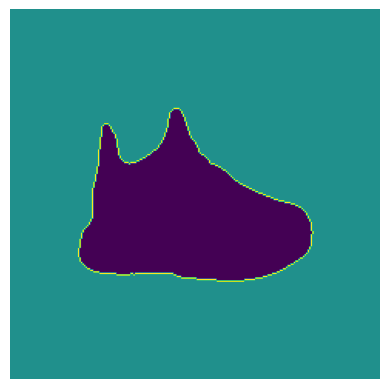

Saved mask ./annotations/trimaps/4.png
Processing image ./images/5.jpg
.RCBS

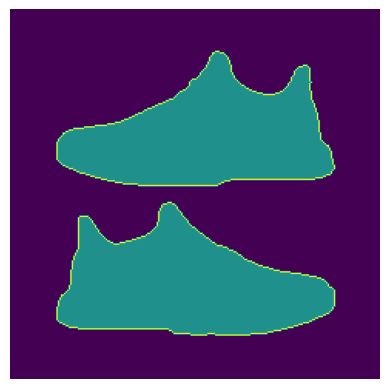

Saved mask ./annotations/trimaps/5.png
Processing image ./images/6.jpg
.RCBS

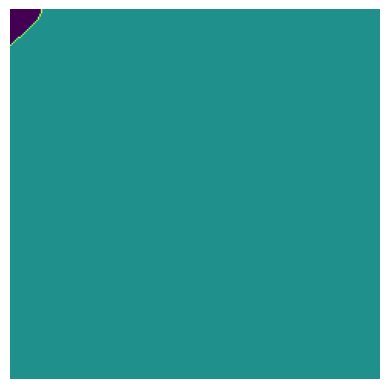

Saved mask ./annotations/trimaps/6.png
Processing image ./images/7.jpg
.RCBS

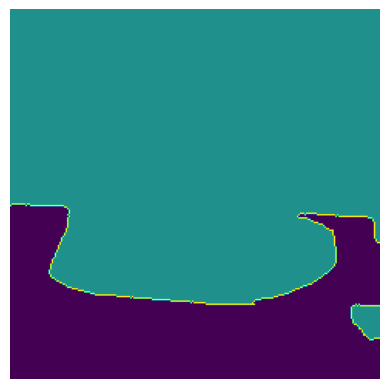

Saved mask ./annotations/trimaps/7.png
Processing image ./images/8.jpg
.RCBS

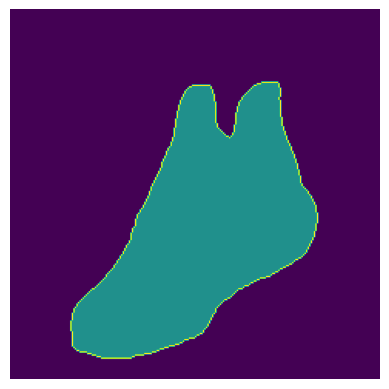

Saved mask ./annotations/trimaps/8.png
Processing image ./images/9.jpg
.RCBS

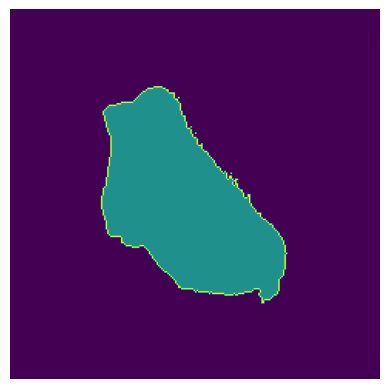

Saved mask ./annotations/trimaps/9.png


In [42]:
total_images = len(input_img_paths)
for i in range(len(input_img_paths)):
    print("processin image ",i," of ",total_images)
    print(f"Processing image {input_img_paths[i]}")
    sam_results = get_mask(input_img_paths[i])
    mask = find_the_best_mask(sam_results)
    png_mask, final_mask = save_the_mask(mask, input_img_paths[i])
    #display_target(final_mask)
    print(f"Saved mask {png_mask}")

In [13]:
target_paths

['./annotations/trimaps/0.png',
 './annotations/trimaps/1.png',
 './annotations/trimaps/10.png',
 './annotations/trimaps/2.png',
 './annotations/trimaps/3.png',
 './annotations/trimaps/4.png',
 './annotations/trimaps/5.png',
 './annotations/trimaps/6.png',
 './annotations/trimaps/7.png',
 './annotations/trimaps/8.png',
 './annotations/trimaps/9.png']